# Data Processing

In [95]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import collections
from analyze import NetworkAnalysis

In [96]:
dfm = pd.read_csv("data/cleaned_data.csv")


# na = NetworkAnalysis(dfm)


g = nx.from_pandas_edgelist(dfm,                # the df containing the data
                            source='from_address',        # first element of the dyad
                            target='to_address',        # second element of the dyad
                            edge_attr='value')
     

In [97]:
g?

Type:           Graph
String form:    Graph with 12754 nodes and 14771 edges
Length:         12754
File:           /opt/anaconda3/envs/smm638/lib/python3.8/site-packages/networkx/classes/graph.py
Docstring:     
Base class for undirected graphs.

A Graph stores nodes and edges with optional data, or attributes.

Graphs hold undirected edges.  Self loops are allowed but multiple
(parallel) edges are not.

Nodes can be arbitrary (hashable) Python objects with optional
key/value attributes, except that `None` is not allowed as a node.

Edges are represented as links between nodes with optional
key/value attributes.

Parameters
----------
incoming_graph_data : input graph (optional, default: None)
    Data to initialize graph. If None (default) an empty
    graph is created.  The data can be any format that is supported
    by the to_networkx_graph() function, currently including edge list,
    dict of dicts, dict of lists, NetworkX graph, NumPy matrix
    or 2d ndarray, SciPy sparse matri

# Calculating average degree

In [98]:
average = sum(k)/len(g.nodes)
average

2.316292927708954

In [99]:
# %% computing the average degree of a network
dv = dict(g.degree())
k = list(dv.values())
print("""
==============================================
    Summary stats on degree distribution
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(k), np.min(k), np.max(k), np.std(k)))



    Summary stats on degree distribution

Mu    :       2.316

Min   :           1
Max   :        1058


Sigma :       18.702




# Degree Distribution Figures

## Normal Histogram

In [100]:
# get degree sequence
k = sorted([d for n, d in g.degree()], reverse=True)

# get count of nodes with degree 'k = k_i'
p_k = np.unique(k, return_counts=True)

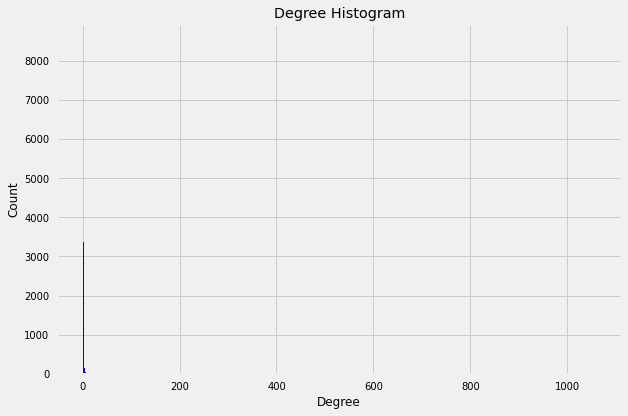

In [101]:


# create figure
fig = plt.figure(figsize=(9, 6))

# create plot
ax = fig.add_subplot(1, 1, 1)

# plot data
plt.bar(p_k[0], p_k[1], width=0.9, color="b")

# aesthetics
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")


plt.show()

## Normal Histogram (Log Scale)

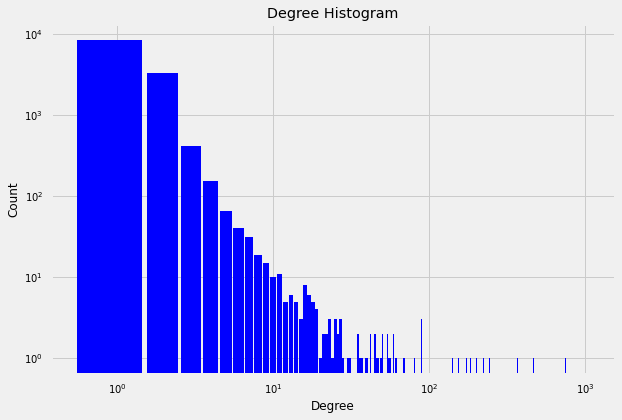

In [115]:
# degree distribution plot (Log Scale)

# create figure
fig = plt.figure(figsize=(9, 6))

# create plot
ax = fig.add_subplot(1, 1, 1)

# plot data
plt.bar(p_k[0], p_k[1], width=0.9, color="b")

# transform the scale of axes
ax.set_xscale('log')
ax.set_yscale('log')


# aesthetics
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")


plt.show()

## Rank Plot

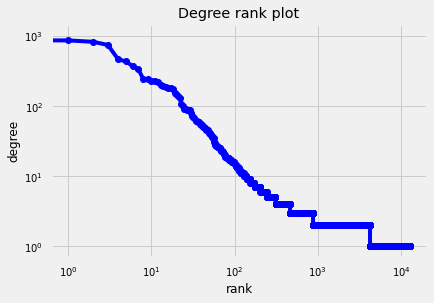

In [103]:
# degree distribution plot - rank plot

# initialize a new figure and plot the data contestually
plt.loglog(k, "b-", marker="o")

# axes properties
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
# plt.axes([0.15, 0.15, 0.4, 0.4])
# Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc)
# plt.axis("off")
# nx.draw_networkx_nodes(Gcc, pos, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()

## Degree Distribution 

### Degree Distribution (Count of Nodes vs Degree)

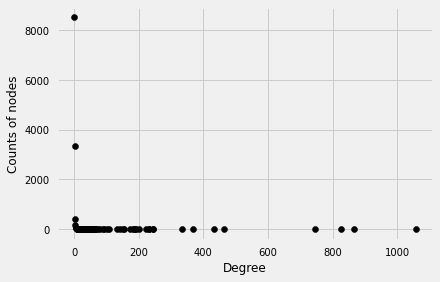

In [104]:
# %% computing the degree distribution of a network
ds = collections.Counter(k)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(ds.keys(), ds.values(), color='k')
ax.set_xlabel('Degree')
ax.set_ylabel('Counts of nodes')
plt.show()

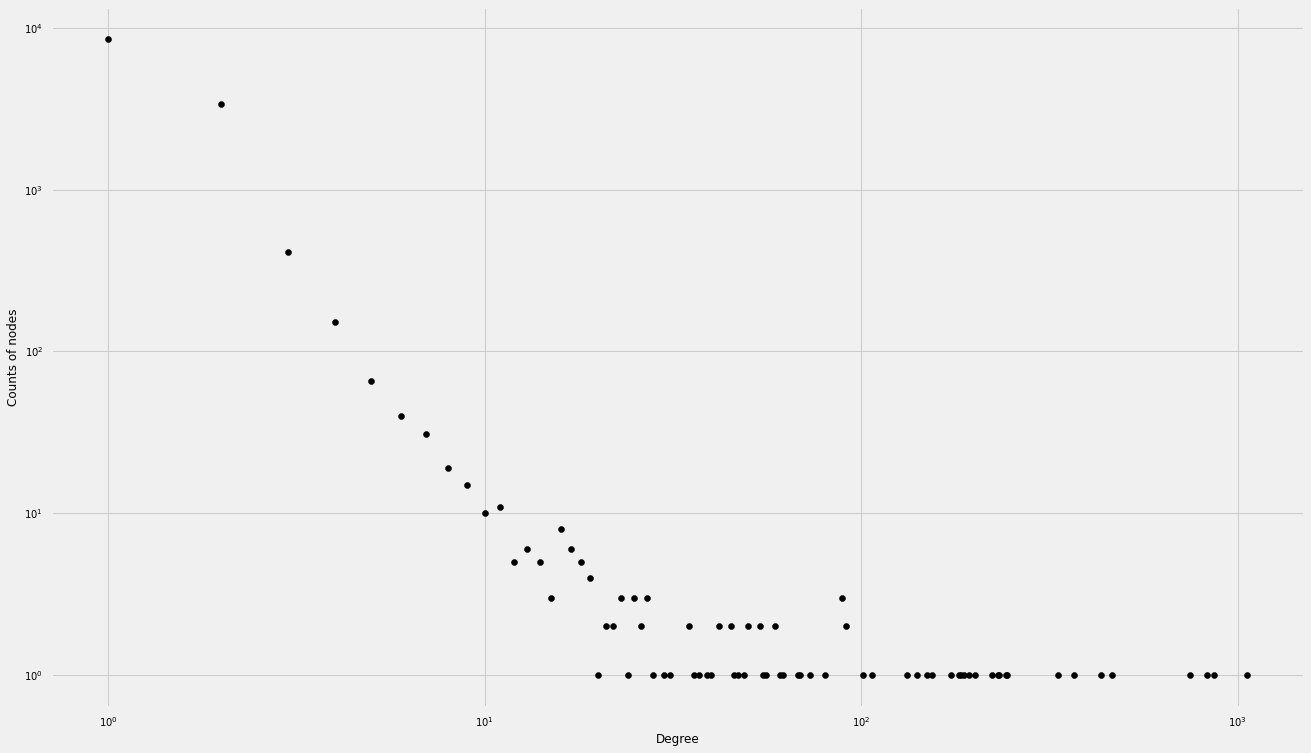

In [105]:

# %% computing the degree distribution of a network
ds = collections.Counter(k)
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(ds.keys(), ds.values(), color='k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('Counts of nodes')
plt.show()




### Degree distribution with poisson distribution

/var/folders/n8/x7x_0smj0lj4_vlzr9zxvmwh0000gn/T/ipykernel_72015/2946869167.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = fig.add_subplot(1, 1, 1)


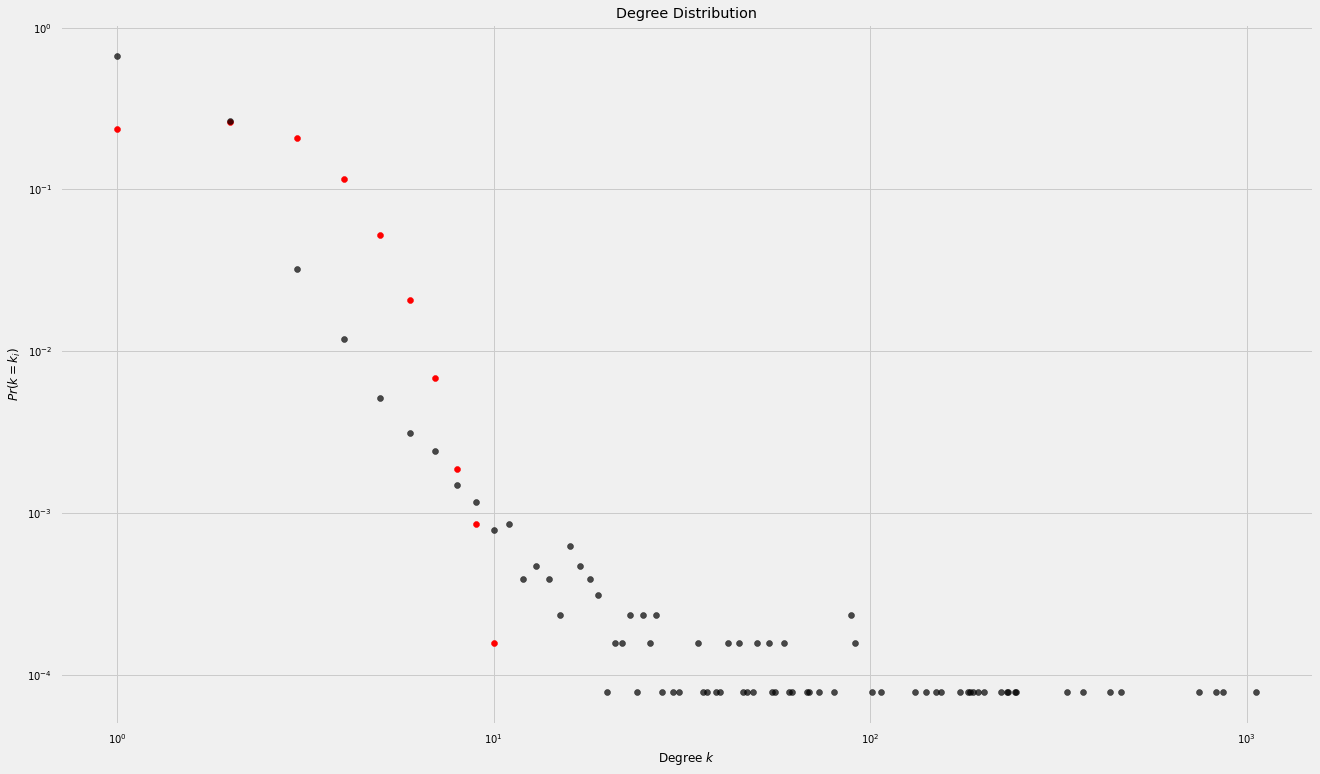

In [110]:
# %% network degree distribution

n = len(g.nodes)


# get nodal degree 'k' data as list
k_g = sorted([d for n, d in g.degree()], reverse=True)

# get 'p_k'
# --+ point-to-point probability
p_k = np.unique(k_g, return_counts=True)
# --+ cumulative probability
cp_k = np.unique(k_g, return_index=True)



# poisson distribution

from collections import Counter

# Creating parameters for poisson (lam = average degree of graph)

poisson_dist = np.random.poisson(lam=average, size=len(g.nodes()))
k_poisson = Counter(poisson_dist)
n_poisson = len(poisson_dist)

x_poisson = list(k_poisson.keys())
x_poisson = pd.DataFrame(x_poisson)
y_poisson = list(k_poisson.values())
y_poisson = pd.DataFrame(y_poisson)


# create figure
fig = plt.figure(figsize=(20, 12))

ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(x_poisson, y_poisson/n_poisson, color='red')

ax1.set_ylabel("count")
ax1.set_xlabel("($k$)")





# add plot
ax0 = fig.add_subplot(1, 1, 1)

# point-to-point data
# --+ plot data
ax0.scatter(p_k[0], p_k[1]/n, marker='o', color='black', alpha=0.7)
# --+ title
ax0.set_title("Degree Distribution")
# --+ labels
ax0.set_ylabel("$Pr(k = k_{i})$")
ax0.set_xlabel("Degree $k$")
ax0.set_yscale('log')
ax0.set_xscale('log')


# show plot
plt.show()

### Degree Distr. with Power Law function

In [111]:
# libraries
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw

# color scheme
plt.style.use('fivethirtyeight')

# matplotlib optioons
# ticks
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'
# fotns
from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)
from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

In [112]:
node_degree = nx.degree(g)
# data series to plot
x = [d for n, d in node_degree]

Calculating best minimal value for power law fit
/opt/anaconda3/envs/smm638/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


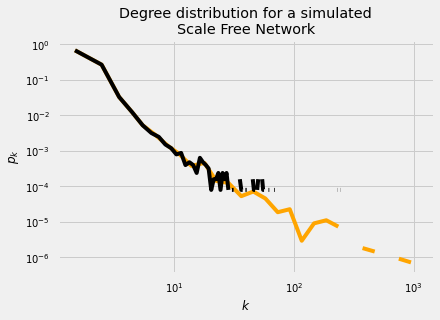

Calculating best minimal value for power law fit
/opt/anaconda3/envs/smm638/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/opt/anaconda3/envs/smm638/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /
/opt/anaconda3/envs/smm638/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/opt/anaconda3/envs/smm638/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/opt/anaconda3/envs/smm638/lib/python3.8/site-packages/powerlaw.py:1185: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/opt/anaconda3/envs/smm638/lib/python3.8/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - 

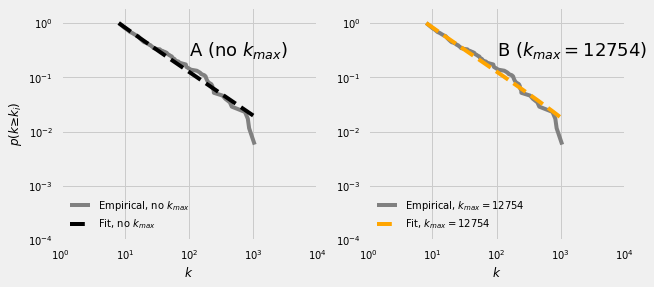

In [113]:
# fit powerlaw
fit = powerlaw.Fit(x)
alpha = fit.power_law.alpha
sigma = fit.power_law.sigma
cmp = fit.distribution_compare('power_law', 'exponential')
## Plot degree distribution
# create figure
fig = plt.figure(figsize=(6, 4))

# add plot
ax = fig.add_subplot(1, 1, 1)

# plot data
powerlaw.plot_pdf(x, color='orange', ax=ax)
powerlaw.plot_pdf(x, linear_bins=True, color='black', ax=ax)

# title
ax.set_title("Degree distribution for a simulated\nScale Free Network")

# labels
ax.set_ylabel(r"$p_{k}$")
ax.set_xlabel(r"$k$")

# show plot
plt.show()
## Identify the scaling range
## create figure
fig = plt.figure(figsize=(9, 4))

# add plots
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# plot data

# panel A -- we assume the distribution has no upper bound
# --------------------------------------------------------
fit = powerlaw.Fit(x, discrete=True, xmax=None, ax=ax0)
fit.plot_ccdf(color='grey', label=r"Empirical, no $k_{max}$", ax=ax0)
fit.power_law.plot_ccdf(color='black', linestyle='--', label=r"Fit, no $k_{max}$", ax=ax0)

# axes
ax0.set_ylim(10**-4, 2)
ax0.set_xlim(np.min(x), 10**4)

# labels
ax0.set_ylabel(u"$p(k ≥ k_{i})$")
ax0.set_xlabel(r"$k$")
handles, labels = ax0.get_legend_handles_labels()

# textbox
ax0.text(10**2, 10**-0.5, r'A (no $k_{max}$)', verticalalignment='center', fontsize=18)

# legend
leg = ax0.legend(handles, labels, loc=3)
leg.draw_frame(False)

# panel B -- we assume the distribution has an upper bound = N (the size of the network)
# --------------------------------------------------------------------------------------
fit = powerlaw.Fit(x, discrete=True, xmax=n, sharey=True)
fit.plot_ccdf(color='grey', label=r"Empirical, $k_{max}=%s$" % n, ax=ax1)
fit.power_law.plot_ccdf(color='orange', linestyle='--', label=r"Fit, $k_{max}=%s$" % n, ax=ax1)

# axes
ax1.set_ylim(10**-4, 2)
ax1.set_xlim(np.min(x), 10**4)

# labels
# ax1.set_ylabel(u"$p(k ≥ k_{i})$")
ax1.set_xlabel(r"$k$")
handles, labels = ax1.get_legend_handles_labels()

# textbox
ax1.text(10**2, 10**-0.5, r'B ($k_{max} = %s$)' % n, verticalalignment='center', fontsize=18)

# legend
leg = ax1.legend(handles, labels, loc=3)
leg.draw_frame(False)

# show plot
plt.show()

# Calculating weight of edges

In [119]:
# <!-- Below- test to calculate weiight of edges -->
# print(g.get_edge_data('0xe592427a0aece92de3edee1f18e0157c05861564', '0x97a50bb3339b992e406db379885b41bc817314b7'))
# type(g.edges.data("value"))

In [123]:
edgeWeight = dict(g.edges())

In [129]:
edgeWeight.values()

dict_values([{'value': 2.3019}, {'value': 5.0}, {'value': 15.0}, {'value': 2.6}, {'value': 3.33}, {'value': 4.0}, {'value': 3.3}, {'value': 88.0}, {'value': 2.5}, {'value': 35.0}, {'value': 3.1}, {'value': 2.2}, {'value': 25.0}, {'value': 2.7}, {'value': 3.0}, {'value': 3.87}, {'value': 5.0}, {'value': 1.4}, {'value': 10.0}, {'value': 5.0}, {'value': 2.4}, {'value': 10.0}, {'value': 4.0}, {'value': 2.0}, {'value': 1.8}, {'value': 2.0}, {'value': 4.2377}, {'value': 30.0}, {'value': 3.5}, {'value': 285.0}, {'value': 1.35}, {'value': 100.0}, {'value': 2.0}, {'value': 1.5}, {'value': 3.0225810814992307}, {'value': 3.0}, {'value': 50.0}, {'value': 50.0}, {'value': 3.0}, {'value': 4.344495244673803}, {'value': 4.0}, {'value': 2.5}, {'value': 32.7}, {'value': 5.0}, {'value': 5.8816}, {'value': 7.0}, {'value': 6.43}, {'value': 1.5}, {'value': 1.8}, {'value': 1.3}, {'value': 3.0}, {'value': 2.0}, {'value': 17.0}, {'value': 5.0}, {'value': 3.0}, {'value': 1.52}, {'value': 10.0}, {'value': 5.0}, 